In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.metrics
%matplotlib inline

## a)

In [2]:
#data=pd.read_csv('OJ.csv')
heart_data=np.loadtxt('reprocessed.hungarian.data.txt')
data=pd.DataFrame(heart_data)
data=data.dropna()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [3]:
#Tomamos los datos target, y los simplificamos para hacer la clasificación binaria
Y=data[13]
mask=Y>1.0
Y.loc[mask]=1.0
#Tomamos los datos X, todos menos el target, y guardamos las llaves de los predictores para cuando se estimen los mejores parametros
X=data.drop(13,axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [5]:
n_trees=np.linspace(1,200,200)
l=len(n_trees)
error=np.zeros(l)
bagg_err=np.zeros(l)
oob_err=np.zeros(l)
oob_forest=np.zeros(l)

In [7]:
for i in range(1,l):
    #inicializa los clasificadores de bagging y random forest
    bclass=BaggingClassifier(n_estimators=i)
    forest=RandomForestClassifier(n_estimators=i)
    #se hace el fit del conjunto train
    bclass.fit(x_train,y_train)
    forest.fit(x_train,y_train)
    #halla la porcion del set que no se uso
    oob=bclass.estimators_samples_[0]
    x_oob=x_train.drop(x_train.index[oob])
    #predicciones del test
    model=bclass.predict(x_test)
    model_prob=bclass.predict_proba(x_test)[:,1]
    forest_prob=forest.predict_proba(x_test)[:,1]
    #predicciones del sub-set oob
    oob_prob=bclass.predict_proba(x_oob)[:,1]
    
    #oob_f=forest.estimator_
    
    error[i]=sklearn.metrics.log_loss(y_test,model_prob, normalize=True)
    oob_err[i]=sklearn.metrics.log_loss(y_train.drop(y_train.index[oob]),oob_prob, normalize=True)
    bagg_err[i]=sklearn.metrics.log_loss(y_test,forest_prob, normalize=True)

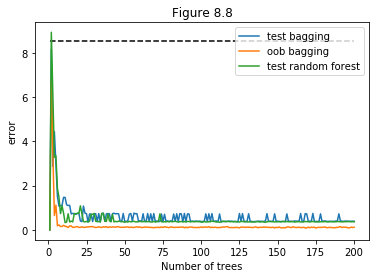

In [8]:
arbol=tree.DecisionTreeClassifier()
arbol.fit(x_train,y_train)
probs1=arbol.predict_proba(x_test)
dashed_line=sklearn.metrics.log_loss(y_test,probs1, normalize=True)

plt.plot(n_trees,error,label='test bagging')
plt.plot(n_trees, oob_err,label='oob bagging')
plt.plot(n_trees, bagg_err,label='test random forest')
plt.xlabel('Number of trees')
plt.ylabel('error')
plt.hlines(dashed_line,xmin=1,xmax=len(n_trees),linestyles='dashed')
plt.title('Figure 8.8')
plt.legend()

## b)

In [2]:
oj = pd.read_csv('OJ.csv')
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
oj=oj.drop('Unnamed: 0', axis=1)
oj['Purchase']=[0 if label=='MM' else 1 for label in oj['Purchase']]
Y=oj['Purchase']
X=oj.drop(['Purchase','Store7'],axis=1)

In [4]:
#mask=np.array(Y=='CH')
#Y[mask]=1
#Y[np.invert(mask)]=0
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.3)

In [12]:
n_trees = np.linspace(1,200,200)
error_p = np.zeros(l)
error_halve=np.zeros(l)
error_sqrt=np.zeros(l)

for i in range(1,l):
    if i%50==0:
        print (i)
    #m=sqrt(p)
    forest1=RandomForestClassifier(n_estimators=i)
    forest1.fit(x_train2,y_train2)
    sqrt_prob=forest1.predict_proba(x_test2)[:,1]
    
    #m=p/2
    forest2=RandomForestClassifier(n_estimators=i,max_features=8)
    forest2.fit(x_train2,y_train2)
    halve_prob=forest2.predict_proba(x_test2)[:,1]
    
    #m=p
    forest3=RandomForestClassifier(n_estimators=i,max_features=16)
    forest3.fit(x_train2,y_train2)
    prob=forest3.predict_proba(x_test2)[:,1]
    
    error_sqrt[i]=sklearn.metrics.log_loss(y_test2,sqrt_prob, normalize=True)
    error_halve[i]=sklearn.metrics.log_loss(y_test2,halve_prob, normalize=True)
    error_p[i]=sklearn.metrics.log_loss(y_test2,prob, normalize=True)

50
100
150


Text(0.5, 1.0, 'Figure 8.10')

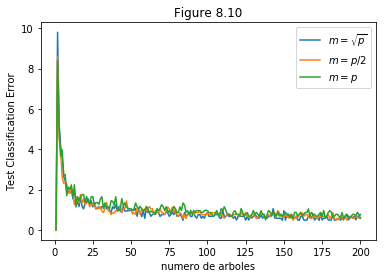

In [13]:
plt.plot(n_trees,error_sqrt,label='$m=\sqrt{p}$')
plt.plot(n_trees,error_halve,label='$m=p/2$')
plt.plot(n_trees,error_p,label='$m=p$')
plt.legend(loc='best')
plt.xlabel('numero de arboles')
plt.ylabel('Test Classification Error')
plt.title('Figure 8.10')

## c)

In [29]:
def F1(y_true,y_model):
    r=sklearn.metrics.recall_score(y_true,y_model,average='macro')
    p=sklearn.metrics.precision_score(y_true,y_model,average='macro')
    #F1 = 2 * (precision * recall) / (precision + recall)
    return 2*(p*r)/(p+r)

In [5]:
from sklearn.linear_model import LogisticRegression

In [30]:
#regresion logistica
logreg = LogisticRegression(C=1e5, solver='newton-cg')
logreg.fit(X,Y)
model=logreg.predict(x_test2)
CM1=sklearn.metrics.confusion_matrix(y_test2,model)
CM1
probs=logreg.predict_proba(x_test2)
logF1=F1(y_test2,model)

In [12]:
precision1,recall1,thresholds1=sklearn.metrics.precision_recall_curve(y_test2,probs[:,1])

In [13]:
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(X,Y)
model=LDA.predict(x_test2)
CM2=sklearn.metrics.confusion_matrix(y_test2,model)
CM2
probs=LDA.predict_proba(x_test2)
LDAF1=F1(y_test2,model)
precision2,recall2,thresholds2=sklearn.metrics.precision_recall_curve(y_test2,probs[:,1])

/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [23]:
#Classification Tree
from sklearn.model_selection import KFold
def K_Fold(X,Y,depth):
    regressor=tree.DecisionTreeClassifier(max_depth=depth)
    kf=KFold(n_splits=6)
    ERR=[]
    for train_index, test_index in kf.split(X):
        xk_train, xk_test = X.iloc[train_index], X.iloc[test_index]
        yk_train, yk_test = Y[train_index], Y[test_index]
        regressor.fit(xk_test,yk_test)
        model=regressor.predict(xk_test)
        ERR.append(sklearn.metrics.mean_squared_error(yk_test,model))
    return np.mean(ERR)
def evaluation(X_train,X_test,Y_train,Y_test,depth):
    a=depth
    regressor=tree.DecisionTreeClassifier(max_depth=a)
    regressor.fit(X_train,Y_train)
    model=regressor.predict(X_test)
    train_model=regressor.predict(X_train)
    return sklearn.metrics.mean_squared_error(Y_test,model),sklearn.metrics.mean_squared_error(Y_train,train_model)

In [24]:
nodes=np.linspace(1,10,10).astype(int)
cv=[]
test,train=[],[]
for i in range(nodes.size):
    a,b=evaluation(x_train2,x_test2,y_train2,y_test2,nodes[i]//1)
    c=K_Fold(X,Y,nodes[i]//1)
    test.append(a),train.append(b),cv.append(c)
bestTreeDepth=nodes[np.argmin(test)]

In [27]:
bestTreeDepth

4

In [25]:
Tree=tree.DecisionTreeClassifier(max_depth=bestTreeDepth)
Tree.fit(X,Y)
model=Tree.predict(x_test2)
CM3=sklearn.metrics.confusion_matrix(y_test2,model)
CM3
probs=Tree.predict_proba(x_test2)[:,0]
TreeF1=F1(y_test2,model)
precision3,recall3,thresholds3=sklearn.metrics.precision_recall_curve(y_test2,probs)

Text(0.5, 1.0, 'Precision Recall curves')

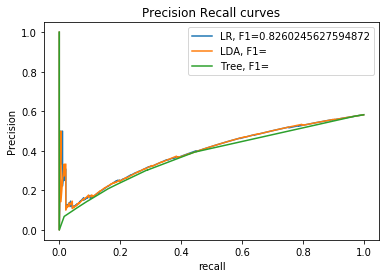

In [32]:
label1='LR, F1='+str(logF1)
label2='LDA, F1='#+str(LDAF1)
label3='Tree, F1='#+str(TreeF1)
plt.plot(recall1,precision1,label=label1)
plt.plot(recall2,precision2,label=label2)
plt.plot(recall3,precision3,label=label3)
plt.legend(loc='best')
plt.xlabel('recall')
plt.ylabel('Precision')
plt.title('Precision Recall curves')